# LASER (JB Prototype) QuickStart

Open a CodeSpace and use the terminal for all these instructions. Feel free to choose a 16 core machine.

### Move to the correct subdirectory.
```
   cd jb
```
'jb' is the home base directory for this code. It is also the location of this notebook, so if you're seeing this you should be halfway there already.

---

### Setup

```
   make setup
```
- Choose "1" for England & Wales -- no further setup needed; Choose "2" for CCS, and type make.

This creates a "sandbox" directory with just the files needed to run. If you choose "2", it actually creates the model input files as well. The default is a single node of 1 million people with everyone 5 & over in the "initial EULA" cohort. As of June 1, 2024, Option "2" has not been testing for some time. Stick with option "1", in which case the pre-existing input model files will be downloaded from idm-data on artifactory.

---

### Go there

```
   pushd /var/tmp/sandbox
```
Note 1: You can change the location of sandbox from /var/tmp/ if you have strong feels about it being somewhere else. It's near the top of setup.sh.

If you chose "2", you can edit the demographics_settings.py file and run make again. If you chose "1" (England and Wales), don't type 'make' or edit the demographics_settings.py. You can change values in settings.py for either scenario. 

### Run

---
Run the model. It should take about 4.5 minutes with 16-cores. Setup takes about 15 seconds. It will run for 7300 timesteps unless you modified settings.py to do otherwise. You will see sparklines dancing around in your console.

```
make run
```

---

### Visualize

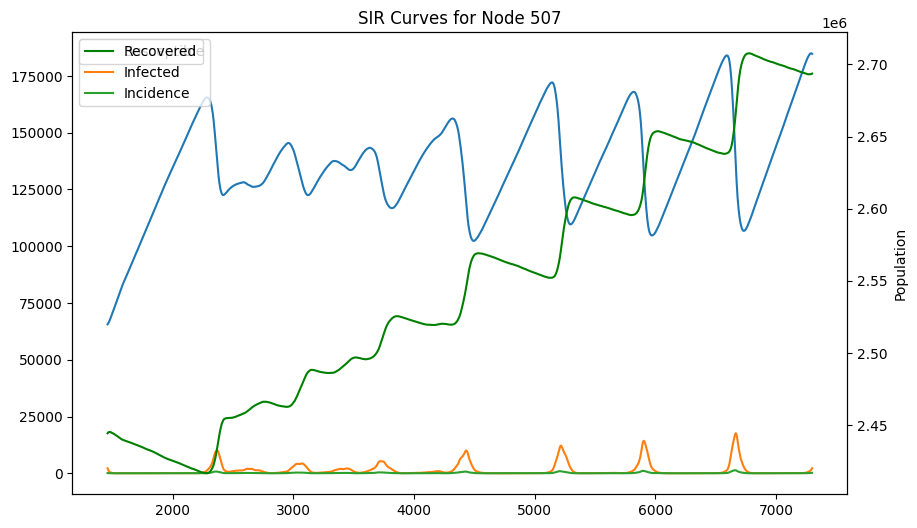

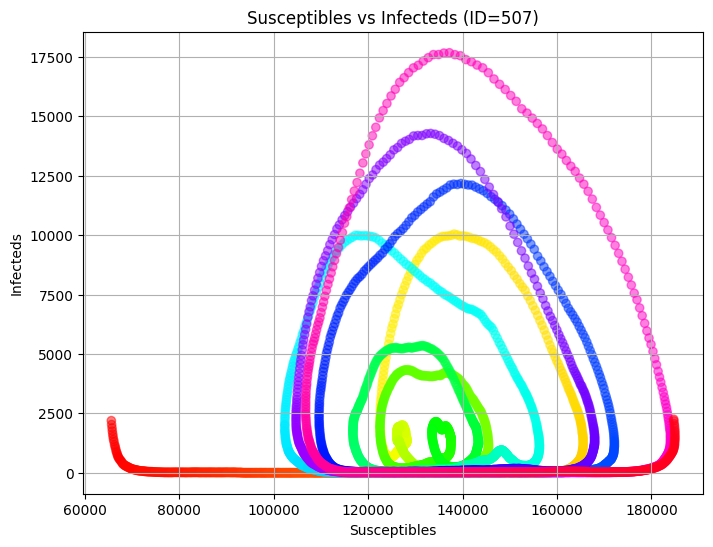

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_sir_curves(node_id=0, csv_file="/var/tmp/sandbox/simulation_output.csv"):
    # Load data from CSV file
    df = pd.read_csv(csv_file)

    # Filter data for the specified node
    node_data = df[df['Node'] == node_id]

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot SIR curves
    ax1.plot(node_data['Timestep'], node_data['Susceptible'], label='Susceptible')
    ax1.plot(node_data['Timestep'], node_data['Infected'], label='Infected')
    #ax1.plot(node_data['Timestep'], node_data['Recovered'], label='Recovered')
    ax1.plot(node_data['Timestep'], node_data['New Infections'], label='Incidence')

    ax2 = ax1.twinx()
    ax2.plot(node_data['Timestep'], node_data['Recovered'], label='Recovered', color='green')
    ax2.set_ylabel('Recovered count')

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Set plot labels and title
    plt.xlabel('Timestamp')
    plt.ylabel('Population')
    plt.title(f'SIR Curves for Node {node_id}')
    plt.legend()

    # Show the plot
    plt.show()

def plot_si_orbital( node_id=507, normalize=False, csv_file="/var/tmp/sandbox/simulation_output.csv"):
    df = pd.read_csv(csv_file)

    df_filtered = df[df['Timestep'] > int(30)]

    # Filter data by ID
    df_filtered = df_filtered[df_filtered['Node'] == node_id]

    # Step 2: Normalize Fractions
    if normalize:
        total_population = df_filtered["Susceptible"] + df_filtered["Infected"] + df_filtered["Recovered"]
        df_filtered.loc[:, "Susceptible_fraction"] = df_filtered["Susceptible"] / total_population
        df_filtered.loc[:, "Infected_fraction"] = df_filtered["Infected"] / total_population
    else:
        df_filtered.loc[:, "Susceptible_fraction"] = df_filtered["Susceptible"]
        df_filtered.loc[:, "Infected_fraction"] = df_filtered["Infected"]

    # Step 3: Plot the Data
    plt.figure(figsize=(8, 6))
    colors=np.linspace(0, 1, len(df_filtered["Susceptible_fraction"]))
    plt.scatter(df_filtered["Susceptible_fraction"], df_filtered["Infected_fraction"], alpha=0.5, c=colors, cmap="hsv")
    plt.title(f"Susceptibles vs Infecteds (ID={node_id})")
    plt.xlabel("Susceptibles")
    plt.ylabel("Infecteds")
    plt.grid(True)
    plt.show()

plot_sir_curves( 507 )
plot_si_orbital( 507 )

# Docker

Alternatively you can run the model in an interactive shell from an existing docker image:

```
sudo docker run -it docker-production.packages.idmod.org/laser-numpyc:bc45255 bash
```
---

# DeepNote
https://deepnote.com/workspace/idm-903a8509-b110-4d4d-93be-a752fefd0d6b/project/LASER-095fb38b-bc23-4447-ab35-79eb252c9bd3/notebook/May2024-2840d7f9b8b54ca6a2599aecc7f9c50f?project-sidebar=project

# Calibration

## Option 1. Build and run model as a webservice in CodeSpaces

Build & run the model as a webservice.
```
   docker-compose up --build &
```
Make note of the URL.

---

Go to the calibration client directory:
```
    cd ../sql_modeling/client
```

---

Open calibrate.py and edit:

    - parameters to calibrate (including ranges)
    - objective function to score output.
    - url of model webservice

---

Run:
```
    python3 calibrate.py
```
Note that in codespaces the model will run longer than the timeout for webservices, so this demo won't really work. But this whole workflow should work on your local machine.

## Option 2. Use existing model webservice in k8s.

Skip the docker-compose and set the url in you the calibrate.py script to:

```
url = http://10.24.49.70:5001/submit
```

Note that the above URL is valid as of June 5, 2024. Getting your own version of the model running in a k8s cluster of your own is outside the scope of this document.


# Website

Browse to http://10.24.49.70 (Not recently tested)

# pip install

Not supported yet.

# Self-Service Webservice

Coming Soon: A complete, self-documented, self-discoverable MaaS.